# 🏠 Kubestronaut Predictor data cleaning
This notebook performs initial data exploration on the `kubestronaut_predictor_data.csv` dataset.

In [13]:
# -------------------------------------------------------------
# Step 1: Import necessary libraries
# -------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
print("✅ Libraries imported.")


✅ Libraries imported.


In [14]:
# -------------------------------------------------------------
# Step 2: Load the raw dataset
# -------------------------------------------------------------
print("📥 Loading dataset...")

df = pd.read_csv("../data/raw/kubestronaut_predictor_data.csv")

print("✅ Dataset loaded successfully!")
print("Initial data shape:", df.shape)
print("\n🔍 Preview of data:")
print(df.head())


📥 Loading dataset...
✅ Dataset loaded successfully!
Initial data shape: (77, 8)

🔍 Preview of data:
   final_result  theory_hours  lab_hours  number_full_exam_done  \
0      0.245754           200        300                    2.0   
1      0.502498           726        700                    3.0   
2      0.069930            12         18                    2.0   
3      0.960040          1100       1100                    4.0   
4      0.212787           180        190                    2.0   

   cncf_try_numbers    location  born_year selfassessment  
0               1.5      Suburb       1956           Good  
1               2.5    Downtown       1998      Excellent  
2               1.5       Rural       1975           Fair  
3               3.0  Waterfront       2005      Excellent  
4               2.0       Urban       1982           Good  


In [15]:
# -------------------------------------------------------------
# Step 3: Understand structure — schema, datatypes, nulls
# -------------------------------------------------------------
print("\n📊 Data types and null value check:")
print(df.info())

print("\n❓ Any missing values?")
print(df.isnull().sum())



📊 Data types and null value check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   final_result           77 non-null     float64
 1   theory_hours           77 non-null     int64  
 2   lab_hours              77 non-null     int64  
 3   number_full_exam_done  77 non-null     float64
 4   cncf_try_numbers       77 non-null     float64
 5   location               77 non-null     object 
 6   born_year              77 non-null     int64  
 7   selfassessment         77 non-null     object 
dtypes: float64(3), int64(3), object(2)
memory usage: 4.9+ KB
None

❓ Any missing values?
final_result             0
theory_hours             0
lab_hours                0
number_full_exam_done    0
cncf_try_numbers         0
location                 0
born_year                0
selfassessment           0
dtype: int64


In [16]:
# Step 3: Drop malformed rows (like the one with missing columns)
df = df.dropna()
df = df[df['final_result'] > 10000]  # basic sanity checks
df = df[df['theory_hours'] > 200]

In [17]:
# -------------------------------------------------------------
# Step 4: Standardize column names (basic cleanup)
# -------------------------------------------------------------
print("\n🧹 Cleaning column names (lowercase, underscores)...")

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("✅ Column names standardized:")
print(df.columns.tolist())



🧹 Cleaning column names (lowercase, underscores)...
✅ Column names standardized:
['final_result', 'theory_hours', 'lab_hours', 'number_full_exam_done', 'cncf_try_numbers', 'location', 'born_year', 'selfassessment']


In [18]:
# -------------------------------------------------------------
# Step 5: Basic stats check (spot outliers or issues)
# -------------------------------------------------------------
print("\n📈 Basic summary stats for numeric columns:")
print(df.describe())



📈 Basic summary stats for numeric columns:
       final_result  theory_hours  lab_hours  number_full_exam_done  \
count           0.0           0.0        0.0                    0.0   
mean            NaN           NaN        NaN                    NaN   
std             NaN           NaN        NaN                    NaN   
min             NaN           NaN        NaN                    NaN   
25%             NaN           NaN        NaN                    NaN   
50%             NaN           NaN        NaN                    NaN   
75%             NaN           NaN        NaN                    NaN   
max             NaN           NaN        NaN                    NaN   

       cncf_try_numbers  born_year  
count               0.0        0.0  
mean                NaN        NaN  
std                 NaN        NaN  
min                 NaN        NaN  
25%                 NaN        NaN  
50%                 NaN        NaN  
75%                 NaN        NaN  
max                 


📊 Plotting distribution of kubestronaut final result...


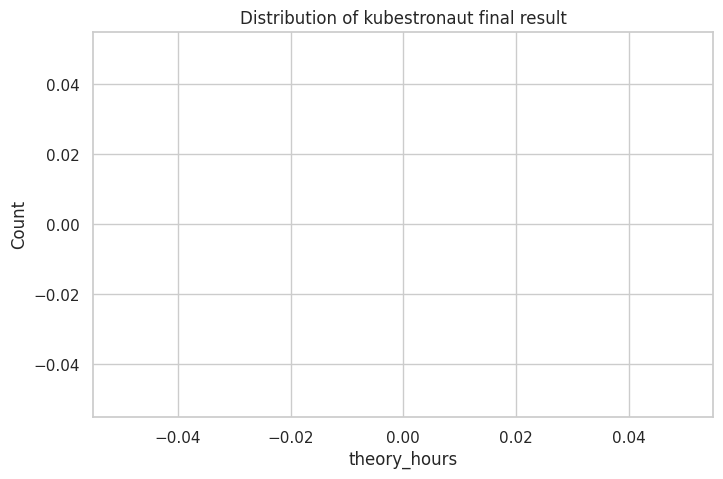

In [19]:
# -------------------------------------------------------------
# Step 6: Visual check for distributions (e.g. Kubestronaut results, Theory hours)
# -------------------------------------------------------------
print("\n📊 Plotting distribution of kubestronaut final result...")

plt.figure(figsize=(8, 5))
sns.histplot(df["final_result"], kde=True, bins=10)
plt.title("Distribution of kubestronaut final result")
plt.xlabel("theory_hours")
plt.ylabel("Count")
plt.show()


In [20]:
# -------------------------------------------------------------
# Step 7: Check for obvious data issues
# -------------------------------------------------------------
print("\n🔍 Looking for negative or unrealistic values...")

for col in ['final_result', 'theory_hours', 'lab_hours', 'number_full_exam_done', 'cncf_try_numbers', 'born_year']:
    invalid = df[df[col] < 0]
    if not invalid.empty:
        print(f"⚠️ Found negative values in {col}:\n{invalid}")
    else:
        print(f"✅ No negative values found in {col}.")



🔍 Looking for negative or unrealistic values...
✅ No negative values found in final_result.
✅ No negative values found in theory_hours.
✅ No negative values found in lab_hours.
✅ No negative values found in number_full_exam_done.
✅ No negative values found in cncf_try_numbers.
✅ No negative values found in born_year.


In [21]:
# -------------------------------------------------------------
# Step 8: Drop duplicates if any
# -------------------------------------------------------------
print("\n🧹 Checking for duplicate rows...")

duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"⚠️ Found {duplicates} duplicate rows. Dropping them...")
    df = df.drop_duplicates()
else:
    print("✅ No duplicate rows found.")



🧹 Checking for duplicate rows...
✅ No duplicate rows found.


In [22]:
# -------------------------------------------------------------
# Step 9: Save the cleaned version (optional here)
# -------------------------------------------------------------
print("\n💾 Saving cleaned version to interim file (optional step)...")

# Uncomment if you want to save at this point
# df.to_csv("../data/interim/cleaned_house_data_v1.csv", index=False)
print("✅ Data engineering preprocessing complete!")



💾 Saving cleaned version to interim file (optional step)...
✅ Data engineering preprocessing complete!


In [23]:
#ls -al
#cd /home/luis/hosue-price-predictor/deployment/mlflow
#docker compose up -d
#source .venv/bin/activate